
### Supporting Made-to-Measure with AI Measuring


### Credit: Zhang et al (2022) [PyMAF-X: Towards Well-aligned Full-body Model Regression from Monocular Images](https://arxiv.org/abs/2207.06400)

In [ ]:
# check if gpu is available
!nvidia-smi
!python --version

Thu Sep 28 14:10:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Set up the environment



In [ ]:
import os
import sys

# Clone repository
!git clone https://github.com/HongwenZhang/PyMAF.git
%cd PyMAF
!git checkout smplx

if not os.path.exists('./examples'):
  os.makedirs('./examples')
if not os.path.exists('./data'):
  os.makedirs('./data')

# Install libraries (note: pin everything on first successful run)

# Torch 1.13.1 is compatiable Python 3.10
!pip3 install torch==1.13.1 torchvision torchaudio torchtext torchdata


import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

# compatiable with torch compatiable python 3.10? https://github.com/openpifpaf/openpifpaf/releases/tag/v0.13.2
!pip3 install --no-build-isolation openpifpaf

Cloning into 'PyMAF'...
remote: Enumerating objects: 502, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 502 (delta 125), reused 96 (delta 96), pack-reused 352
Receiving objects: 100% (502/502), 7.29 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (283/283), done.
/content/PyMAF
Branch 'smplx' set up to track remote branch 'smplx' from 'origin'.
Switched to a new branch 'smplx'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 54.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a whi

## Copy over the requiste data


In [ ]:
from google.colab import drive

# Download datasets
drive.mount('/content/drive')

%cd examples
!cp /content/drive/MyDrive/Sankofa_Sizer/pymafx/examples.zip . && unzip -q examples.zip && rm -rf examples.zip
%cd ../data
!cp /content/drive/MyDrive/Sankofa_Sizer/pymafx/data.zip . && unzip -q data.zip && mv data/* . && rm -rf data.zip
%cd ..

Mounted at /content/drive
/content/PyMAF/examples
/content/PyMAF/data
/content/PyMAF


In [ ]:
# Install other libraries that seem to be missed,
# openpifpaf takes > 5 minutes!!!
!pip3 install einops
!pip3 install torchgeometry # ?
!pip3 install smplx==0.1.28
!pip3 install boto3
!pip3 install kornia
!pip3 install yacs
!pip3 install filterpy
!pip3 install chumpy
!pip3 install trimesh
!pip3 install pyrender
!pip3 install pycocotools
!pip3 install json_tricks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 831.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 749.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=6288a04050490f3a500e031abd0db4d5702187942d47b54301e4813f1e1b0910


In [ ]:
# copy over our test images
!mkdir -p examples/my_images
!cp /content/drive/MyDrive/Sankofa_Sizer/pymafx/my_images/* examples/my_images

In [ ]:
# Run against our test images!
from IPython.display import Image
import glob

# Validate install by checking against their test image
#!python3 -m apps.demo_smplx --image_folder examples/coco_images --detection_threshold 0.3 --pretrained_model data/pretrained_model/PyMAF-X_model_checkpoint_v1.1.pt --misc TRAIN.BHF_MODE full_body MODEL.PyMAF.HAND_VIS_TH 0.1

!python3 -m apps.demo_smplx --image_folder examples/my_images --detection_threshold 0.3 --pretrained_model data/pretrained_model/PyMAF-X_model_checkpoint_v1.1.pt --misc TRAIN.BHF_MODE full_body MODEL.PyMAF.HAND_VIS_TH 0.1

# Display the generated images
base_dir = "output/my_images/my_images_output/"

for filepath in glob.iglob('base_dir/*'):
  Image(filename=filepath)

/content/PyMAF/models/hr_module.py:481: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or self.pretrained_layers[0] is '*':
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
initializing openpifpaf
Running demo...
Input video number of frames 3
Downloading: "http://github.com/DuncanZauss/openpifpaf_assets/releases/download/v0.1.0/sk30_wholebody.pkl" to /root/.cache/torch/hub/checkpoints/sk30_wholebody.pkl
100% 173M/173M [00:10<00:00, 17.3MB/s]
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
Running openpifpaf for person detection...
  0% 0/3 [00:00<?, ?it/s]src/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo

##SKIP

In [ ]:
import os
if not os.path.exists('./examples'):
  os.makedirs('./examples')
if not os.path.exists('./data'):
  os.makedirs('./data')

In [ ]:
!wget --no-check-certificate --user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" -O examples.zip "https://onedrive.live.com/download?cid=4000FF1C757A8D39&resid=4000FF1C757A8D39%212096&authkey=AARry-HzC9EhhSA"
!wget --no-check-certificate --user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" -O data.zip "https://onedrive.live.com/download?cid=4000FF1C757A8D39&resid=4000FF1C757A8D39%212102&authkey=AJFgvFyLEVvQVTI"
%cd examples
!mv ../examples.zip . && unzip -q examples.zip && rm -rf examples.zip
%cd ../data
!mv ../data.zip . && unzip -q data.zip && mv data/* . && rm -rf data.zip
%cd ..

--2023-09-26 22:01:08--  https://onedrive.live.com/download?cid=4000FF1C757A8D39&resid=4000FF1C757A8D39%212096&authkey=AARry-HzC9EhhSA
Resolving onedrive.live.com (onedrive.live.com)... 13.107.43.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.43.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ufvmeg.dm.files.1drv.com/y4mfjbOK-J245ioiwSigdKX5nYbVkkdqVN_z5DlmeQUdvruPxJcec_-wE6e6wa4x3EY3YVP-vCJNm0UYnIqt-12_wMDxA7cxpqrQpgZ7qqDuJj-jLKU2hR4cyY7Wp1Z1b4M9-YAwdcTAcSrQDSyryY_GmopyUc3Z5DJ0Gxo2O49IlOSUZCAfB3CBDh-IP9xkwvsAFCEBfw4mm_h0e_s6tEH5g/examples.zip?download&psid=1 [following]
--2023-09-26 22:01:08--  https://ufvmeg.dm.files.1drv.com/y4mfjbOK-J245ioiwSigdKX5nYbVkkdqVN_z5DlmeQUdvruPxJcec_-wE6e6wa4x3EY3YVP-vCJNm0UYnIqt-12_wMDxA7cxpqrQpgZ7qqDuJj-jLKU2hR4cyY7Wp1Z1b4M9-YAwdcTAcSrQDSyryY_GmopyUc3Z5DJ0Gxo2O49IlOSUZCAfB3CBDh-IP9xkwvsAFCEBfw4mm_h0e_s6tEH5g/examples.zip?download&psid=1
Resolving ufvmeg.dm.files.1drv.com (ufvmeg.dm.files.1drv.com

In [ ]:
# PyTorch tested on version 1.9.0
!pip3 install -U torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# pytorch3d
!pip3 install -U "git+https://github.com/facebookresearch/pytorch3d.git@stable"
# other packages listed in requirements.txt
!pip3 install -U -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.9.0+cu111
  Clon

#Add my own custom image folder

In [ ]:
!mkdir -p examples/my_images
!wget https://raw.githubusercontent.com/robinsonkwame/static/main/robinson_running_resized.png -P examples/my_images

--2023-09-26 21:19:18--  https://raw.githubusercontent.com/robinsonkwame/static/main/robinson_running_resized.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255304 (249K) [image/png]
Saving to: ‘examples/my_images/robinson_running_resized.png’

robinson_running_re 100%[===================>] 249.32K  --.-KB/s    in 0.04s   

2023-09-26 21:19:18 (6.69 MB/s) - ‘examples/my_images/robinson_running_resized.png’ saved [255304/255304]

robinson_running_resized.png


In [ ]:
# retroactive fix, seems to be missing https://github.com/HongwenZhang/PyMAF-X/blob/smplx/requirements.txt ???
!pip3 install einops
!pip3 install torchgeometry # ?
!pip3 install smplx==0.1.28
!pip3 install boto3
!pip3 install kornia
!pip3 install yacs
!pip3 install filterpy
!pip3 install chumpy
!pip3 install trimesh
!pip3 install pyrender
!pip3 install pycocotools
!pip3 install json_tricks

  Using cached openpifpaf-0.13.1.tar.gz (223 kB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=f71e1f05236cbfcd13ac0f6c4b669ddc878b52df364d003842ba149ff12b2fb8
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy
     ━━━━

In [ ]:
# Installing PyTorch3d is a pain, see: https://github.com/facebookresearch/pytorch3d/blob/main/INSTALL.md#3-install-wheels-for-linux
# this notebook might have been better as a conda install

import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu117_pyt1131/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 17.5 MB/s eta 0:00:00


In [ ]:
# this takes quite a while, > 5 minutes
!pip3 install openpifpaf

## For an image folder as input:

In [ ]:
# Validate install by checking against their test image
!python3 -m apps.demo_smplx --image_folder examples/coco_images --detection_threshold 0.3 --pretrained_model data/pretrained_model/PyMAF-X_model_checkpoint_v1.1.pt --misc TRAIN.BHF_MODE full_body MODEL.PyMAF.HAND_VIS_TH 0.1

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
initializing openpifpaf
Running demo...
Input video number of frames 2
Downloading: "http://github.com/DuncanZauss/openpifpaf_assets/releases/download/v0.1.0/sk30_wholebody.pkl" to /root/.cache/torch/hub/checkpoints/sk30_wholebody.pkl
100% 173M/173M [00:01<00:00, 133MB/s]
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
Running openpifpaf for person detection...
  0% 0/2 [00:00<?, ?it/s]src/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
src/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:an

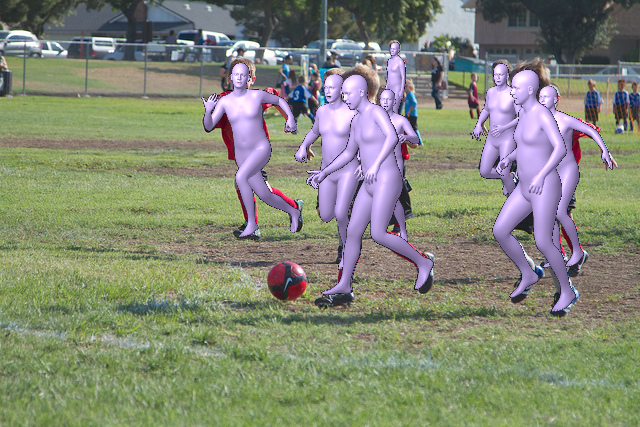

In [ ]:
# Display the generated image
from IPython.display import Image
Image(filename='output/coco_images/coco_images_output/COCO_val2014_000000004700.png')

In [ ]:
# Now try me!
!python3 -m apps.demo_smplx --image_folder examples/my_images --detection_threshold 0.3 --pretrained_model data/pretrained_model/PyMAF-X_model_checkpoint_v1.1.pt --misc TRAIN.BHF_MODE full_body MODEL.PyMAF.HAND_VIS_TH 0.1

/usr/bin/python3: Error while finding module specification for 'apps.demo_smplx' (ModuleNotFoundError: No module named 'apps')


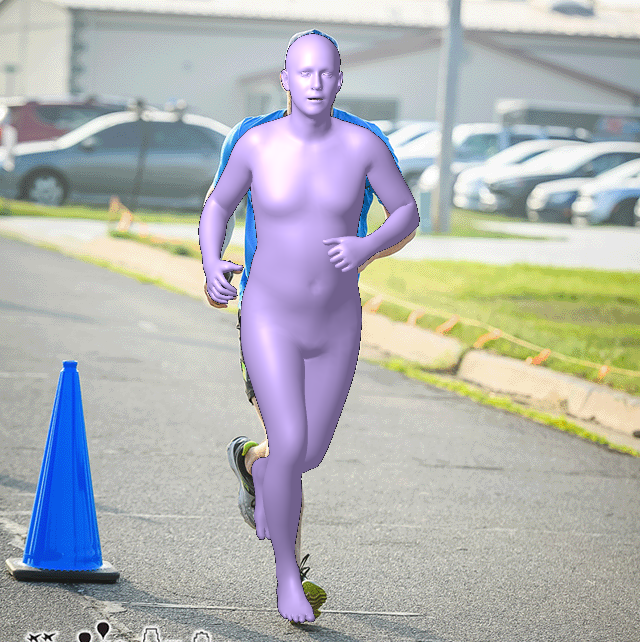

In [ ]:
# Display the generated image
whole = "output/my_images/my_images_output/robinson_running_resized.png"
arm = "output/my_images/my_images_output/arm/robinson_running_resized.png"

from IPython.display import Image
Image(filename=whole)

## For a video as input:

In [ ]:
!python3 -m apps.demo_smplx --vid_file examples/dancer.mp4 --pretrained_model data/pretrained_model/PyMAF-X_model_checkpoint_v1.1.pt --misc TRAIN.BHF_MODE full_body MODEL.PyMAF.HAND_VIS_TH 0.1

In [ ]:
# Play the generated video
from IPython.display import HTML
from base64 import b64encode

def video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video width=500 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

video('output/dancer/dancer_result.mp4')